# Model Data

Place where the magic happens

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import random



import statsmodels.api as sm
from statsmodels.formula.api import ols

# I want to see all information
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [18]:
# read information from csv file
df = pd.read_csv("data/clean_kc_house_data.csv") 
df = df.drop('Unnamed: 0', axis=1)
df.shape

(17637, 22)

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement,yard_size
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650,0,4470
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1,98125,47.7210,-122.319,1690,7639,400,4672
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062,0,9230
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000,910,3040
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503,0,6400


## Visualizing Target/Feature Relationships

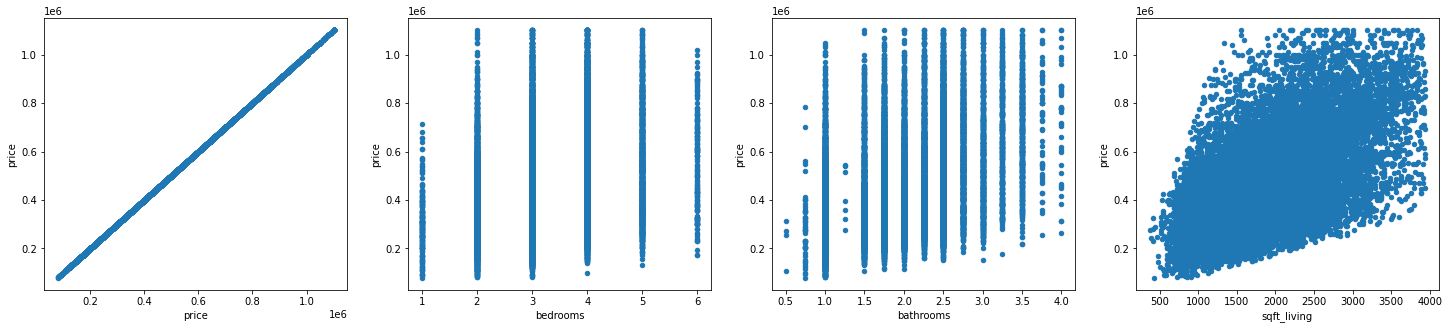

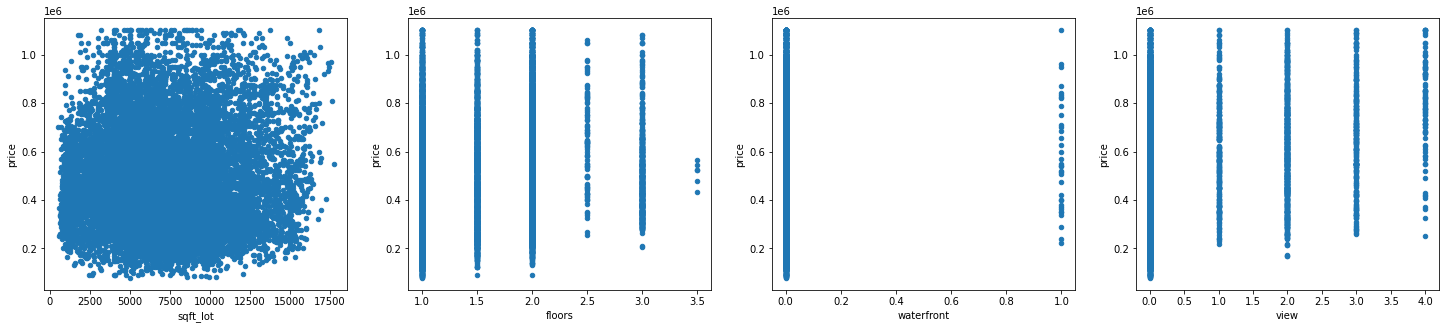

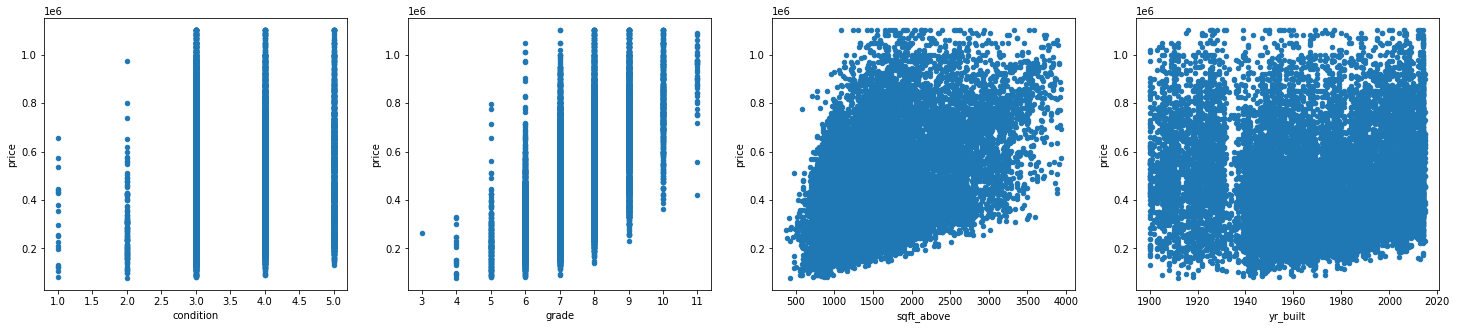

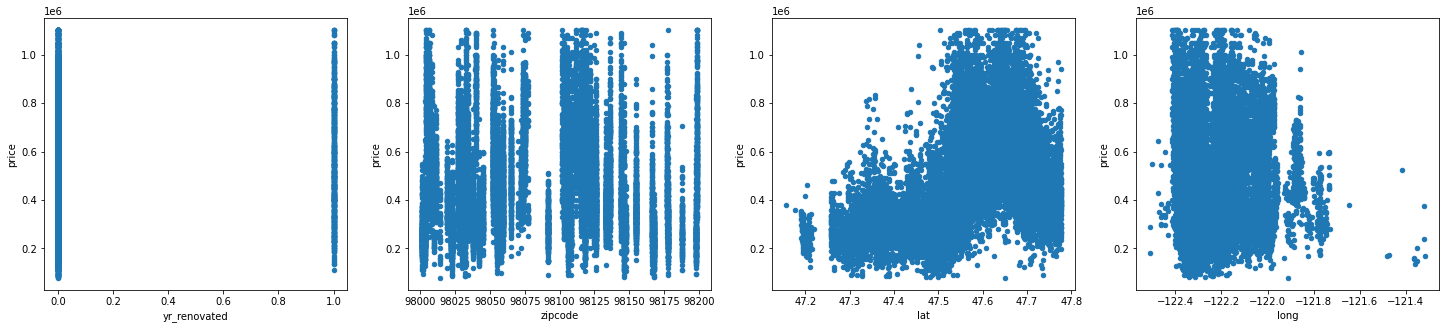

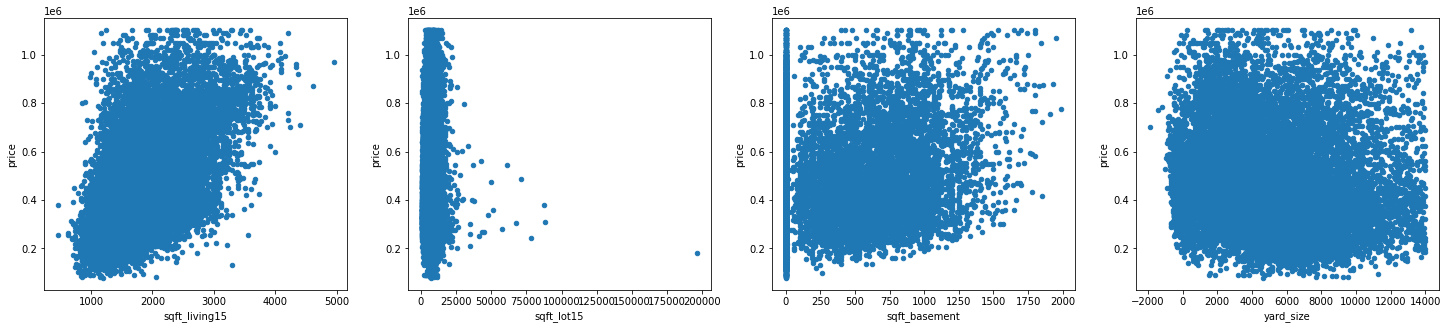

In [20]:
column_list = list(df.columns)

# First 4 features
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for xcol, ax in zip(column_list[2:6], axes):
    df.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax)

# Next 4 features
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
                         
for xcol, ax in zip(column_list[6:10], axes):
    df.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax)    

# Next 4
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
                         
for xcol, ax in zip(column_list[10:14], axes):
    df.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax)

# Next 4
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
                         
for xcol, ax in zip(column_list[14:18], axes):
    df.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax)

# Next 4    
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
                         
for xcol, ax in zip(column_list[18:22], axes):
    df.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax)

From these plots, we can easily see which variables are categorical and which are exhibiting some possible linear relationships. There is definitely some heteroscedasticity that will need to be dealt with, but this gives us a good idea of which variables we might want to consider using.

## Visualizing Feature Distributions

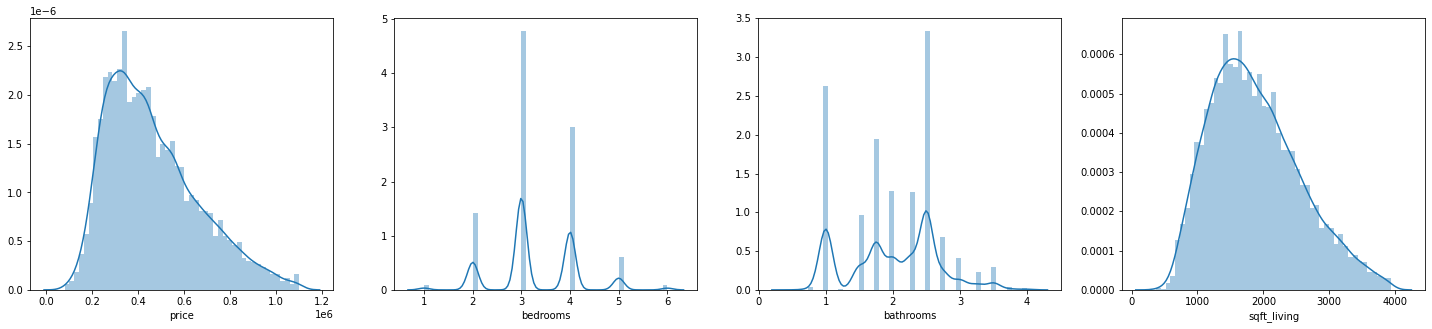

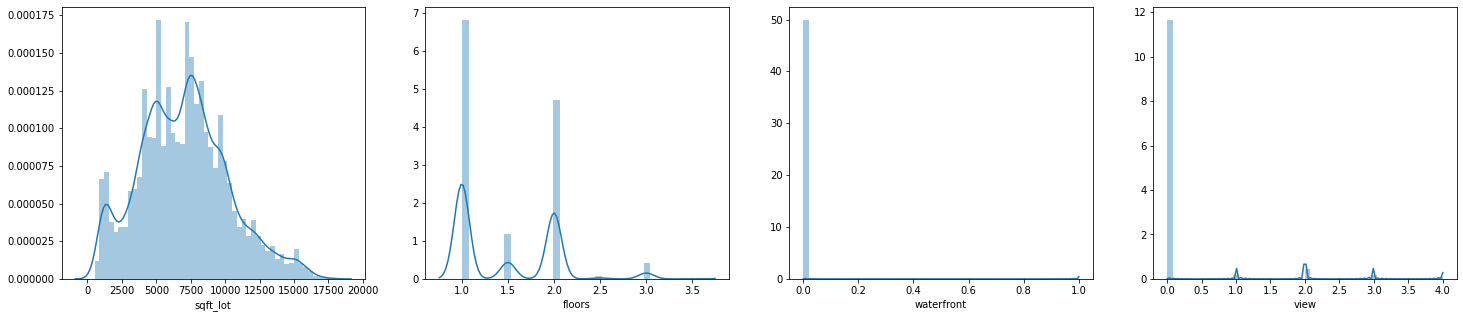

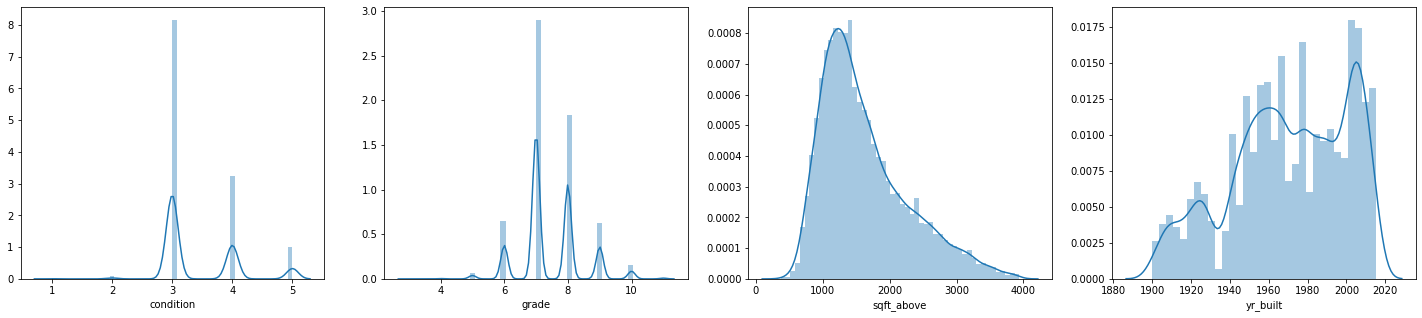

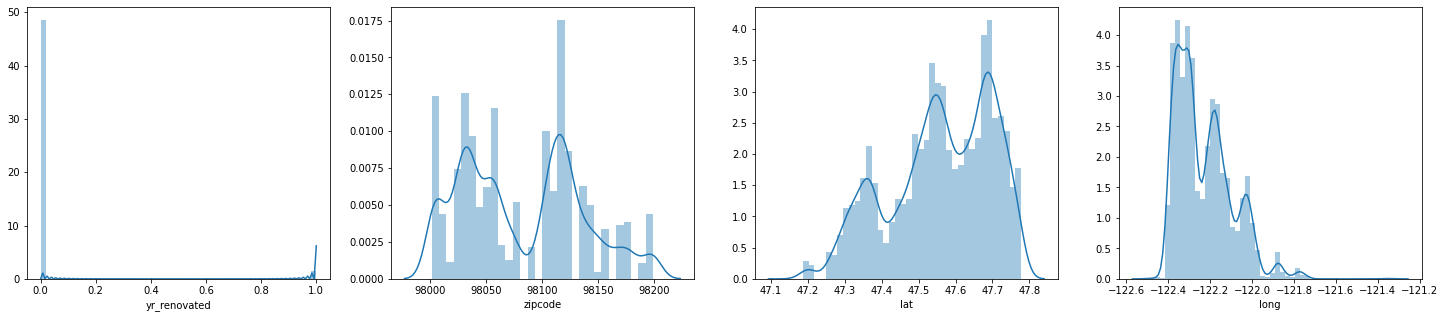

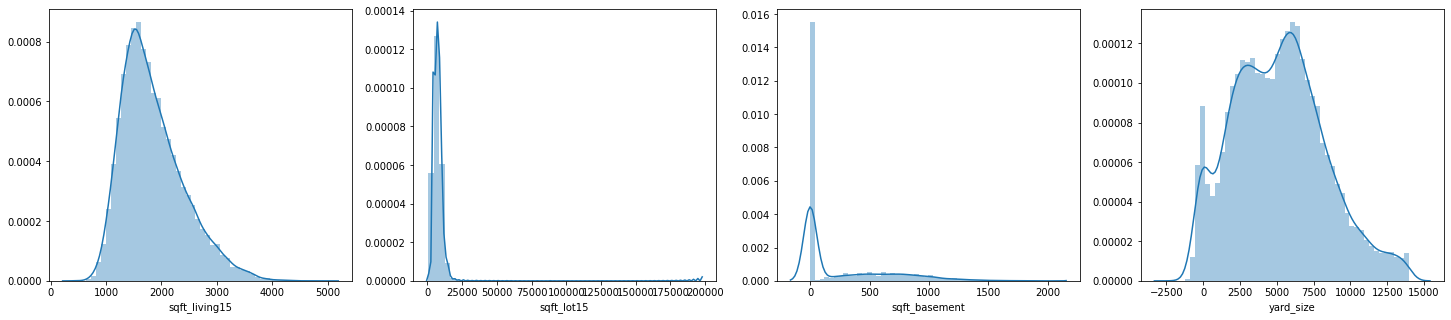

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for feature, ax in zip(column_list[2:6], axes):
    sns.distplot(df[feature], ax=ax)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for feature, ax in zip(column_list[6:10], axes):
    sns.distplot(df[feature], ax=ax)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for feature, ax in zip(column_list[10:14], axes):
    sns.distplot(df[feature], ax=ax)
    
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for feature, ax in zip(column_list[14:18], axes):
    sns.distplot(df[feature], ax=ax)
    
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

for feature, ax in zip(column_list[18:22], axes):
    sns.distplot(df[feature], ax=ax)

## Looking for Multicollinearity

a) Normality
Normality assumption requires variables to be normally distributed for concluding some sort of statistical significance. It also requires that the calculated error values follow a normal distribution to produce unbiased estimates with the minimum variance - for that later after the regression.

However, this assumption is not mandatory for regression if you don't want to do any hypothesis testing. OLS works fine for non-normal data distributions in the context of prediction.

The easiest way to check for this assumption is with histograms, Kernel Density Estimate plot (KDE) or Q-Q-Plots.

(21.5, -0.5)

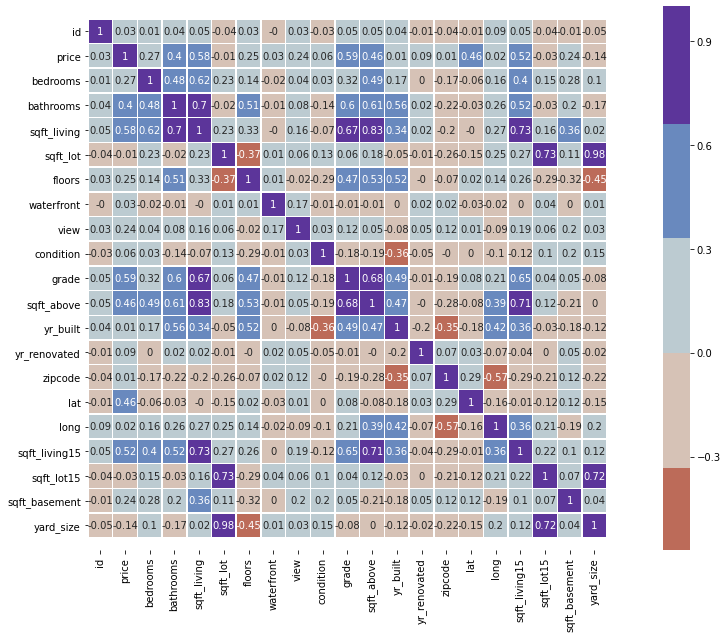

In [23]:
#Heatmap of all correlation coefficients
plt.figure(figsize=(20,10))
ax= sns.heatmap(round(df.corr(),2), annot=True, cmap=sns.color_palette('twilight_shifted_r'), center=0, linewidths=.5, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Sqr_lot and yard_size appears to be problematic. This is a calculated feature, anyway and I don't think it'll be super important. I'm going to drop them.

In [27]:
df_predictors = df.iloc[:,3:]
df_predictors.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement,yard_size
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650,0,4470
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1,98125,47.7210,-122.319,1690,7639,400,4672
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062,0,9230
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000,910,3040
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503,0,6400


In [29]:
df_predictors = df_predictors.drop('yard_size', axis = 1)

In [30]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.591367
sqft_living      0.577723
sqft_living15    0.515945
sqft_above       0.464163
lat              0.458512
bathrooms        0.403731
bedrooms         0.272187
floors           0.248771
view             0.241556
sqft_basement    0.239222
yr_renovated     0.091005
condition        0.057523
id               0.033258
waterfront       0.027946
long             0.022820
zipcode          0.007088
yr_built         0.005700
sqft_lot        -0.014724
sqft_lot15      -0.031213
yard_size       -0.140934
Name: price, dtype: float64

In [9]:
round(df_predictors.corr(), 3)

,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
sqft_living,1.000,0.207,0.336,0.007,0.168,-0.044,0.670,0.835,0.386,0.310,0.047,-0.199,0.005,0.256,0.709,0.194,-0.030,0.020,0.001
sqft_lot,0.207,1.000,-0.370,0.043,0.049,0.124,0.040,0.167,0.089,-0.051,-0.014,-0.251,-0.148,0.274,0.267,0.873,0.004,-0.010,-0.008
floors,0.336,-0.370,1.000,0.008,0.011,-0.263,0.469,0.528,-0.287,0.497,0.010,-0.050,0.029,0.091,0.238,-0.371,-0.022,0.017,0.003
waterfront,0.007,0.043,0.008,1.000,0.249,-0.008,0.003,-0.001,0.015,-0.023,0.052,0.040,-0.007,-0.001,0.027,0.053,0.004,-0.002,-0.004
view,0.168,0.049,0.011,0.249,1.000,0.022,0.152,0.068,0.186,-0.085,0.075,0.130,0.032,-0.121,0.206,0.057,0.016,-0.013,0.008
condition,-0.044,0.124,-0.263,-0.008,0.022,1.000,-0.153,-0.155,0.182,-0.348,-0.065,-0.016,0.010,-0.063,-0.089,0.131,-0.051,0.023,0.000
grade,0.670,0.040,0.469,0.003,0.152,-0.153,1.000,0.672,0.071,0.464,0.013,-0.184,0.089,0.212,0.625,0.052,-0.035,0.017,-0.004
sqft_above,0.835,0.167,0.528,-0.001,0.068,-0.155,0.672,1.000,-0.185,0.429,0.016,-0.278,-0.066,0.371,0.681,0.159,-0.022,0.016,0.000
sqft_basement,0.386,0.089,-0.287,0.015,0.186,0.182,0.071,-0.185,1.000,-0.166,0.058,0.110,0.121,-0.165,0.125,0.079,-0.015,0.008,0.001
yr_built,0.310,-0.051,0.497,-0.023,-0.085,-0.348,0.464,0.429,-0.166,1.000,-0.188,-0.339,-0.183,0.423,0.309,-0.025,0.004,-0.004,0.004


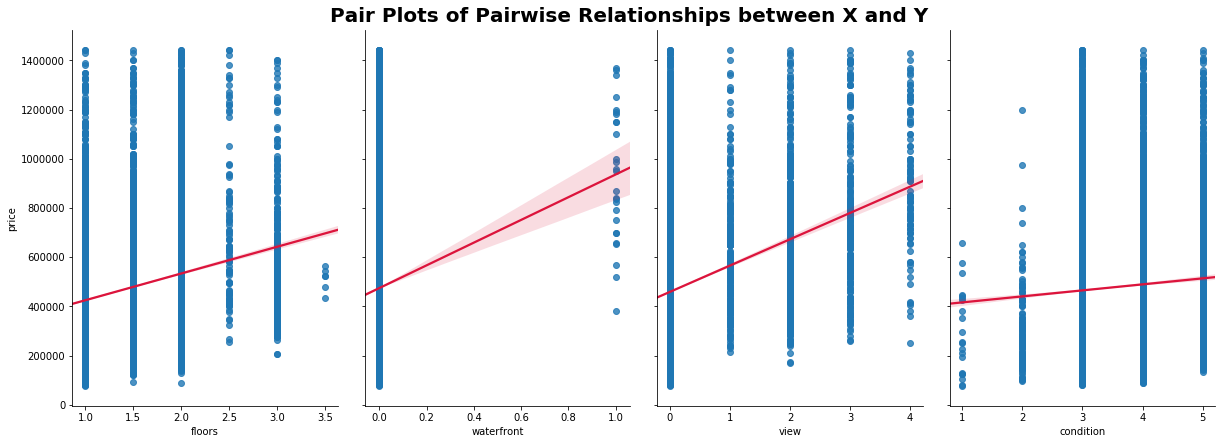

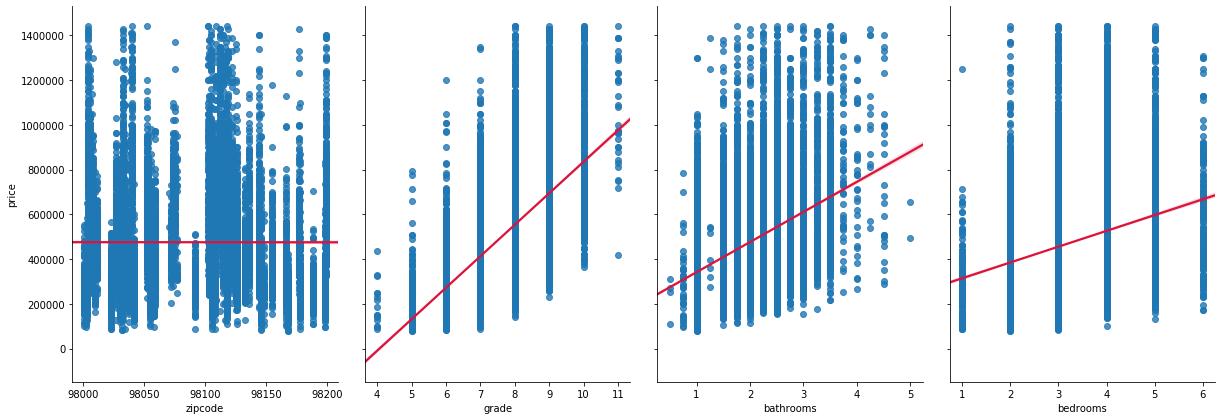

In [77]:
# visualize the pairwise relationship between the features and the response using pairplots (seaborn scatterplots)
#Floors, waterfront, view, condition, zipcode, and grade - look like a categorical data
#Bathrooms and bedrooms would also be categorical, but have some outlier

sns.pairplot(x_vars=['floors', 'waterfront', 'view', 'condition'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Pairwise Relationships between X and Y', size=20, weight='bold', y=1.02)

sns.pairplot(x_vars=['zipcode', 'grade', 'bathrooms', 'bedrooms'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)
plt.show();

Text(0.5, 1.02, 'Pair Plots of Pairwise Relationships between X and Y')

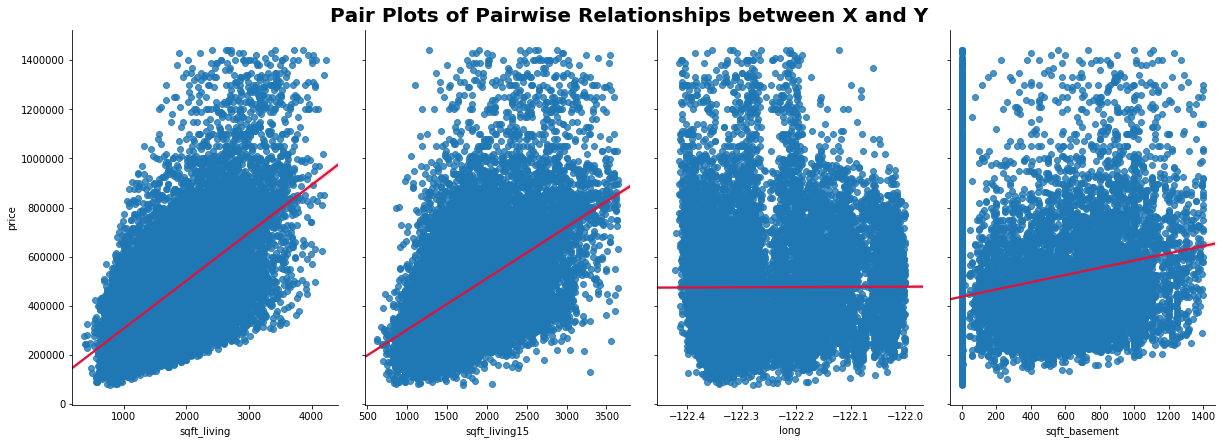

In [79]:
#Price, bedrooms, sqft_living, sqft_above, sqft_living15, view, long, sqft_basement

sns.pairplot(x_vars=['sqft_living',  'sqft_living15', 'long','sqft_basement'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Pairwise Relationships between X and Y', size=20, weight='bold', y=1.02)



## Other correlations to consider:
* grade and sqft_living
* sqft_above and sqft_living
* sqft_living15 and sqft_living

In [31]:
df_predictors = df_predictors.drop('sqft_above', axis = 1)

In [32]:
abs(df_predictors.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


I decided to drop 'sqft_above' as I feel that sqft_living is a more holistic metric and will be more useful for predictions.

## Encoding Categorical Variables

In [34]:
bedrooms_dummies = pd.get_dummies(df_predictors['bedrooms'], prefix = 'bed', drop_first = True)
bathrooms_dummies = pd.get_dummies(df_predictors['bathrooms'], prefix = 'bath', drop_first = True)
floors_dummies = pd.get_dummies(df_predictors['floors'], prefix = 'floor', drop_first = True)
view_dummies = pd.get_dummies(df_predictors['view'], prefix = 'view', drop_first = True)
waterfront_dummies = pd.get_dummies(df_predictors['waterfront'], prefix = 'water', drop_first = True)
condition_dummies = pd.get_dummies(df_predictors['condition'], prefix = 'cond', drop_first = True)
yr_renovated_dummies = pd.get_dummies(df_predictors['yr_renovated'], prefix = 'reno', drop_first = True)
zipcode_dummies = pd.get_dummies(df_predictors['zipcode'], prefix = 'zip', drop_first = True)
grade_dummies = pd.get_dummies(df_predictors['grade'], prefix = 'grade', drop_first = True)

In [73]:
df_predictors.to_csv('data/predictors.csv', index=False)
bedrooms_dummies.to_csv('data/bedrooms_dummies.csv', index=False)
bathrooms_dummies.to_csv('data/bathrooms_dummies.csv', index=False)
floors_dummies.to_csv('data/floors_dummies.csv', index=False)
view_dummies.to_csv('data/view_dummies.csv', index=False)
waterfront_dummies.to_csv('data/waterfront_dummies.csv', index=False)
condition_dummies.to_csv('data/condition_dummies.csv', index=False)
yr_renovated_dummies.to_csv('data/yr_renovated_dummies.csv', index=False)
zipcode_dummies.to_csv('data/zipcode_dummies.csv', index=False)
grade_dummies.to_csv('data/grade_dummies.csv', index=False)

In [35]:
df_predictors = df_predictors.drop(['bedrooms', 'bathrooms', 'floors', 'view', 'waterfront', 'condition', 'yr_renovated', 'zipcode', 'grade'], axis = 1)

In [36]:
df_predictors = pd.concat([df_predictors, bedrooms_dummies, bathrooms_dummies, floors_dummies, view_dummies, waterfront_dummies, condition_dummies, yr_renovated_dummies, zipcode_dummies, grade_dummies], axis = 1)

In [37]:
print(df_predictors.columns)
print(df_predictors.shape)
df_predictors

Index(['sqft_living', 'sqft_lot', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'sqft_basement', 'bed_2', 'bed_3',
       ...
       'zip_98198', 'zip_98199', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11'],
      dtype='object', length=119)
(17637, 119)


,sqft_living,sqft_lot,yr_built,lat,long,sqft_living15,sqft_lot15,sqft_basement,bed_2,bed_3,bed_4,bed_5,bed_6,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,bath_3.75,bath_4.0,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5,view_1.0,view_2.0,view_3.0,view_4.0,water_1.0,cond_2,cond_3,cond_4,cond_5,reno_1,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,1180,5650,1955,47.5112,-122.257,1340,5650,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,2570,7242,1951,47.7210,-122.319,1690,7639,400,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,770,10000,1933,47.7379,-122.233,2720,8062,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1960,5000,1965,47.5208,-122.393,1360,5000,910,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1680,8080,1987,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17632,1530,1131,2009,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17633,2310,5813,2014,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17634,1020,1350,2009,47.5944,-122.299,1020,2007,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
17635,1600,2388,2004,47.5345,-122.069,1410,1287,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Model 1: Based on my EDA, I am going to try a multivariate model with categorical variables - Grade, Zipcode, and Waterfront

In [38]:
data_ols = pd.concat([df['price'], grade_dummies, waterfront_dummies, zipcode_dummies], axis = 1)

In [39]:
data_ols.head()

,price,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,water_1.0,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
data_ols.rename(columns = {'water_1.0': 'water_1'}, inplace = True)

outcome = 'price'
predictors = data_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [41]:
model1 = ols(formula=formula, data=data_ols).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     564.6
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:42:52   Log-Likelihood:            -2.2918e+05
No. Observations:               17637   AIC:                         4.585e+05
Df Residuals:                   17558   BIC:                         4.591e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.467e+05   1.07e+05      2.301      0.021    3.65e+04    4.57e+05
grade_4    -1.553e+05    1.1e+05     -1.410      0.159   -3.71e+05    6.06e+04
grade_5    -1.292e+05   1.07e+05     -1.204      0.229    -3.4e+05    8.11e+04
grade_6    -8.759e+04   1.07e+05     -0.818      0.413   -2.97e+05    1.22e+05
grade_7    -1.039e+04   1.07e+05     -0.097      0.923    -2.2e+05    1.99e+05
grade_8     8.243e+04   1.07e+05      0.770      0.441   -1.27e+05    2.92e+05
grade_9     2.265e+05   1.07e+05      2.116      0.034    1.67e+04    4.36e+05
grade_10     3.14e+05   1.07e+05      2.930      0.003    1.04e+05    5.24e+05
grade_11    4.555e+05   1.08e+05      4.204      0.000    2.43e+05    6.68e+05
water_1     1.713e+05   1.82e+04      9.435      0.000    1.36e+05    2.07e+05
zip_98002   1.641e+04      1e+04      1.633      0.102   -3283.056    3.61e+04
zip_98003    334.8123   9211.681      0.036      0.971   -1.77e+04    1.84e+04
zip_98004   5.276e+05   1.12e+04     47.206      0.000    5.06e+05    5.49e+05
zip_98005   3.612e+05   1.23e+04     29.443      0.000    3.37e+05    3.85e+05
zip_98006   3.059e+05   8637.770     35.418      0.000    2.89e+05    3.23e+05
zip_98007   2.576e+05   1.14e+04     22.678      0.000    2.35e+05     2.8e+05
zip_98008    2.63e+05   9248.561     28.442      0.000    2.45e+05    2.81e+05
zip_98010   8.979e+04   1.75e+04      5.127      0.000    5.55e+04    1.24e+05
zip_98011   1.637e+05   1.03e+04     15.890      0.000    1.43e+05    1.84e+05
zip_98014   8.541e+04   1.83e+04      4.670      0.000    4.96e+04    1.21e+05
zip_98019   1.172e+05   1.12e+04     10.487      0.000    9.53e+04    1.39e+05
zip_98022   1.534e+04   1.09e+04      1.402      0.161   -6102.091    3.68e+04
zip_98023  -1.966e+04   8097.360     -2.428      0.015   -3.55e+04   -3790.822
zip_98024   1.329e+05   2.37e+04      5.614      0.000    8.65e+04    1.79e+05
zip_98027   2.186e+05   9430.983     23.177      0.000       2e+05    2.37e+05
zip_98028   1.457e+05   9382.193     15.530      0.000    1.27e+05    1.64e+05
zip_98029   2.019e+05   8970.357     22.504      0.000    1.84e+05    2.19e+05
zip_98030   7522.3688   9419.485      0.799      0.425   -1.09e+04     2.6e+04
zip_98031   1.696e+04   9305.146      1.823      0.068   -1278.869    3.52e+04
zip_98032  -6498.6275   1.19e+04     -0.548      0.583   -2.97e+04    1.67e+04
zip_98033   3.336e+05   8637.337     38.627      0.000    3.17e+05    3.51e+05
zip_98034   1.876e+05   7980.547     23.505      0.000    1.72e+05    2.03e+05
zip_98038   4.685e+04   7997.103      5.858      0.000    3.12e+04    6.25e+04
zip_98039   6.336e+05    4.4e+04     14.398      0.000    5.47e+05     7.2e+05
zip_98040    4.64e+05    1.1e+04     42.074      0.000    4.42e+05    4.86e+05
zip_98042   1.377e+04   8172.966      1.685      0.092   -2248.617    2.98e+04
zi

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


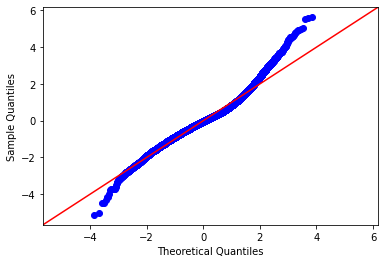

In [43]:
residuals = model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### Summary for model 1:
* R-squared = 0.715
* Overall P-Value = 0.00
* Intercept has P-Value < .05
Most of my dummy features have a P-Value of 0 - although there are definitely some exceptions. The biggest offenders are the 'grade' dummy variables. I am going to explore removing those later. For now, I want to try a completely different method.
This model is definitely complex, due primarily to the # of zipcode dummy variables. I want to try a simple multivariate regression model that only has a couple of highly-correlated (with Price), continuous features.

### Model 2: Square Feet and Grade 

In [44]:
df['living_log'] = np.log(df['sqft_living'])

In [46]:
data_ols2 = pd.concat([df['price'], grade_dummies, df['living_log']], axis = 1)

In [47]:
data_ols2.head()

,price,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,living_log
0,221900.0,0,0,0,1,0,0,0,0,7.073270
1,538000.0,0,0,0,1,0,0,0,0,7.851661
2,180000.0,0,0,1,0,0,0,0,0,6.646391
3,604000.0,0,0,0,1,0,0,0,0,7.580700
4,510000.0,0,0,0,0,1,0,0,0,7.426549


In [48]:
outcome = 'price'
predictors = data_ols2.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [49]:
model2 = ols(formula=formula, data=data_ols2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     1346.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:46:08   Log-Likelihood:            -2.3563e+05
No. Observations:               17637   AIC:                         4.713e+05
Df Residuals:                   17627   BIC:                         4.714e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.415e+05   1.56e+05     -4.763      0.000   -1.05e+06   -4.36e+05
grade_4    -9.727e+04   1.58e+05     -0.616      0.538   -4.07e+05    2.12e+05
grade_5    -1.054e+05   1.54e+05     -0.685      0.493   -4.07e+05    1.96e+05
grade_6     -8.44e+04   1.54e+05     -0.550      0.583   -3.85e+05    2.17e+05
grade_7     -4.23e+04   1.54e+05     -0.275      0.783   -3.43e+05    2.59e+05
grade_8      3.93e+04   1.54e+05      0.256      0.798   -2.62e+05     3.4e+05
grade_9     1.616e+05   1.54e+05      1.051      0.293    -1.4e+05    4.63e+05
grade_10    2.448e+05   1.54e+05      1.591      0.112   -5.67e+04    5.46e+05
grade_11    3.327e+05   1.56e+05      2.139      0.032    2.79e+04    6.38e+05
living_log  1.605e+05   4138.228     38.774      0.000    1.52e+05    1.69e+05
==============================================================================
Omnibus:                     1028.187   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1223.045
Skew:                           0.614   Prob(JB):                    2.63e-266
Kurtosis:                       3.397   Cond. No.                     3.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


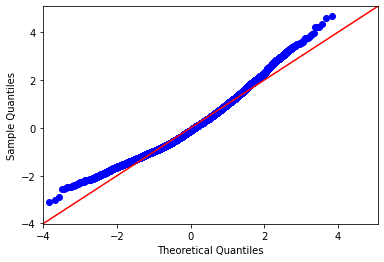

In [50]:
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### Summary for model 2:
* R-Squared is very LOW 
* high individual P-Values is high for almost every feature. 

### Model 3: Square Feet and Zipcode 

In [51]:
data_ols3 = pd.concat([df['price'], zipcode_dummies, df['living_log']], axis = 1)

In [52]:
outcome = 'price'
predictors = data_ols3.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [53]:
model3 = ols(formula=formula, data=data_ols3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     823.5
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:48:33   Log-Likelihood:            -2.2742e+05
No. Observations:               17637   AIC:                         4.550e+05
Df Residuals:                   17566   BIC:                         4.555e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.851e+06   1.68e+04   -110.182      0.000   -1.88e+06   -1.82e+06
zip_98002   8696.0578   9072.373      0.959      0.338   -9086.693    2.65e+04
zip_98003   1.833e+04   8330.932      2.200      0.028    1997.629    3.47e+04
zip_98004   5.535e+05   1.01e+04     54.758      0.000    5.34e+05    5.73e+05
zip_98005   3.743e+05   1.11e+04     33.765      0.000    3.53e+05    3.96e+05
zip_98006   3.392e+05   7777.635     43.615      0.000    3.24e+05    3.54e+05
zip_98007   2.844e+05   1.03e+04     27.695      0.000    2.64e+05    3.04e+05
zip_98008   2.679e+05   8365.712     32.023      0.000    2.52e+05    2.84e+05
zip_98010   1.014e+05   1.58e+04      6.414      0.000    7.04e+04    1.32e+05
zip_98011   1.653e+05   9316.362     17.740      0.000    1.47e+05    1.84e+05
zip_98014    1.15e+05   1.65e+04      6.965      0.000    8.26e+04    1.47e+05
zip_98019   1.006e+05   1.01e+04      9.952      0.000    8.08e+04     1.2e+05
zip_98022   2.738e+04   9873.646      2.773      0.006    8025.447    4.67e+04
zip_98023   -501.5068   7317.049     -0.069      0.945   -1.48e+04    1.38e+04
zip_98024   1.436e+05   2.14e+04      6.716      0.000    1.02e+05    1.85e+05
zip_98027   2.613e+05   8496.533     30.758      0.000    2.45e+05    2.78e+05
zip_98028   1.499e+05   8485.488     17.671      0.000    1.33e+05    1.67e+05
zip_98029   2.663e+05   8057.862     33.043      0.000     2.5e+05    2.82e+05
zip_98030   1.026e+04   8522.533      1.204      0.229   -6442.941     2.7e+04
zip_98031    1.75e+04   8418.465      2.079      0.038    1000.745     3.4e+04
zip_98032   9530.1418   1.07e+04      0.889      0.374   -1.15e+04    3.05e+04
zip_98033   3.565e+05   7803.706     45.681      0.000    3.41e+05    3.72e+05
zip_98034   1.964e+05   7219.916     27.206      0.000    1.82e+05    2.11e+05
zip_98038   3.966e+04   7235.985      5.482      0.000    2.55e+04    5.38e+04
zip_98039    6.84e+05   3.98e+04     17.176      0.000    6.06e+05    7.62e+05
zip_98040    4.93e+05   9950.840     49.547      0.000    4.74e+05    5.13e+05
zip_98042   2.194e+04   7393.824      2.967      0.003    7443.905    3.64e+04
zip_98045   1.136e+05   1.02e+04     11.123      0.000    9.36e+04    1.34e+05
zip_98052   2.926e+05   7209.069     40.585      0.000    2.78e+05    3.07e+05
zip_98053   2.766e+05   8616.361     32.105      0.000     2.6e+05    2.94e+05
zip_98055   5.321e+04   8411.243      6.326      0.000    3.67e+04    6.97e+04
zip_98056   1.234e+05   7633.066     16.162      0.000    1.08e+05    1.38e+05
zip_98058   4.941e+04   7620.347      6.484      0.000    3.45e+04    6.43e+04
zip_98059   1.196e+05   7706.532     15.516      0.000    1.04e+05    1.35e+05
zip_98065   1.624e+05   8277.675     19.617      0.000    1.46e+05    1.79e+05
zip_98070   1.478e+05   2.09e+04      7.059      0.000    1.07e+05    1.89e+05
zi

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


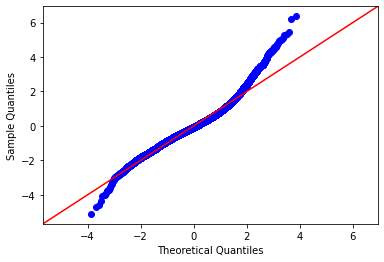

In [54]:
residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### Summary for model 3:
* R-Squared is high 
* most individual variables have a significant P-Value
* overall P-Value is significant

### Model 4: Add more features for modeling - Grade, Waterfront, Zipcode, Square Feet

Here is 3 categorical features.

In [56]:
data_ols4 = pd.concat([df['price'], grade_dummies, waterfront_dummies, zipcode_dummies, df['sqft_living']], axis = 1)

In [57]:
data_ols4.rename(columns = {'water_1.0': 'water_1'}, inplace = True)

outcome = 'price'
predictors = data_ols4.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [59]:
model4 = ols(formula=formula, data=data_ols4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     948.9
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:51:31   Log-Likelihood:            -2.2559e+05
No. Observations:               17637   AIC:                         4.513e+05
Df Residuals:                   17557   BIC:                         4.520e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.691e+05   8.75e+04      1.932      0.053   -2416.394    3.41e+05
grade_4      -1.68e+05   8.99e+04     -1.870      0.062   -3.44e+05    8132.098
grade_5     -1.784e+05   8.76e+04     -2.038      0.042    -3.5e+05   -6812.774
grade_6     -1.695e+05   8.74e+04     -1.941      0.052   -3.41e+05    1674.982
grade_7     -1.535e+05   8.73e+04     -1.758      0.079   -3.25e+05    1.77e+04
grade_8     -1.179e+05   8.74e+04     -1.350      0.177   -2.89e+05    5.33e+04
grade_9     -4.233e+04   8.74e+04     -0.484      0.628   -2.14e+05    1.29e+05
grade_10     -320.5201   8.75e+04     -0.004      0.997   -1.72e+05    1.71e+05
grade_11     1.007e+05   8.85e+04      1.138      0.255   -7.27e+04    2.74e+05
water_1      1.809e+05   1.48e+04     12.205      0.000    1.52e+05     2.1e+05
zip_98002    1.634e+04   8196.768      1.994      0.046     275.434    3.24e+04
zip_98003    1.393e+04   7517.647      1.853      0.064    -807.262    2.87e+04
zip_98004    5.404e+05   9119.659     59.256      0.000    5.23e+05    5.58e+05
zip_98005    3.536e+05      1e+04     35.318      0.000    3.34e+05    3.73e+05
zip_98006    2.984e+05   7048.426     42.338      0.000    2.85e+05    3.12e+05
zip_98007     2.64e+05   9268.316     28.488      0.000    2.46e+05    2.82e+05
zip_98008    2.635e+05   7546.346     34.912      0.000    2.49e+05    2.78e+05
zip_98010    9.357e+04   1.43e+04      6.548      0.000    6.56e+04    1.22e+05
zip_98011    1.515e+05   8405.053     18.019      0.000    1.35e+05    1.68e+05
zip_98014    1.052e+05   1.49e+04      7.049      0.000     7.6e+04    1.34e+05
zip_98019    9.553e+04   9122.694     10.471      0.000    7.76e+04    1.13e+05
zip_98022    2.701e+04   8927.027      3.026      0.002    9515.531    4.45e+04
zip_98023   -1.305e+04   6607.401     -1.975      0.048    -2.6e+04     -95.186
zip_98024    1.364e+05   1.93e+04      7.062      0.000    9.85e+04    1.74e+05
zip_98027     2.26e+05   7695.600     29.371      0.000    2.11e+05    2.41e+05
zip_98028    1.409e+05   7655.555     18.403      0.000    1.26e+05    1.56e+05
zip_98029    2.272e+05   7324.305     31.016      0.000    2.13e+05    2.42e+05
zip_98030    7926.5984   7685.811      1.031      0.302   -7138.353     2.3e+04
zip_98031    1.951e+04   7592.564      2.570      0.010    4628.054    3.44e+04
zip_98032    6484.2979   9670.097      0.671      0.503   -1.25e+04    2.54e+04
zip_98033    3.358e+05   7047.656     47.647      0.000    3.22e+05     3.5e+05
zip_98034    1.931e+05   6511.979     29.656      0.000     1.8e+05    2.06e+05
zip_98038    3.619e+04   6526.207      5.546      0.000    2.34e+04     4.9e+04
zip_98039    6.797e+05   3.59e+04     18.927      0.000    6.09e+05     7.5e+05
zip_98040    4.558e+05   8999.270     50.649      0.000    4.38e+05    4.73e+05
zip_98042     1.56e+04   6668.744      2.33

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


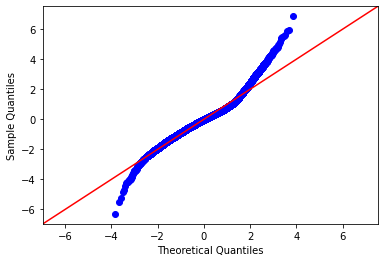

In [60]:
residuals = model4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### Summary for model 4: 
**Highest R-Squared for all model I'm done before**

### Model 5: Waterfront + Zipcode + Square Feet 

Here I use 2 categorical and 1 continuous features.

In [61]:
data_ols5 = pd.concat([df['price'], waterfront_dummies, zipcode_dummies, df['sqft_living']], axis = 1)


In [62]:
data_ols5.rename(columns = {'water_1.0': 'water_1'}, inplace = True)

outcome = 'price'
predictors = data_ols5.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [63]:
model5 = ols(formula=formula, data=data_ols5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     913.0
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:54:04   Log-Likelihood:            -2.2661e+05
No. Observations:               17637   AIC:                         4.534e+05
Df Residuals:                   17565   BIC:                         4.539e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.592e+04   5885.939     -6.102      0.000   -4.75e+04   -2.44e+04
water_1      1.903e+05   1.57e+04     12.126      0.000     1.6e+05    2.21e+05
zip_98002    7426.9264   8667.518      0.857      0.392   -9562.268    2.44e+04
zip_98003     1.88e+04   7960.053      2.361      0.018    3192.621    3.44e+04
zip_98004    5.529e+05   9657.600     57.253      0.000    5.34e+05    5.72e+05
zip_98005    3.684e+05   1.06e+04     34.776      0.000    3.48e+05    3.89e+05
zip_98006    3.249e+05   7437.472     43.683      0.000     3.1e+05    3.39e+05
zip_98007    2.804e+05   9810.567     28.584      0.000    2.61e+05       3e+05
zip_98008    2.673e+05   7993.370     33.435      0.000    2.52e+05    2.83e+05
zip_98010     8.93e+04   1.51e+04      5.910      0.000    5.97e+04    1.19e+05
zip_98011    1.597e+05   8902.728     17.940      0.000    1.42e+05    1.77e+05
zip_98014    1.056e+05   1.58e+04      6.701      0.000    7.47e+04    1.37e+05
zip_98019    9.426e+04   9662.245      9.755      0.000    7.53e+04    1.13e+05
zip_98022    2.647e+04   9433.429      2.806      0.005    7980.398     4.5e+04
zip_98023   -4673.2700   6991.334     -0.668      0.504   -1.84e+04    9030.437
zip_98024    1.354e+05   2.04e+04      6.629      0.000    9.53e+04    1.75e+05
zip_98027     2.51e+05   8120.091     30.915      0.000    2.35e+05    2.67e+05
zip_98028    1.464e+05   8108.262     18.055      0.000     1.3e+05    1.62e+05
zip_98029    2.626e+05   7699.919     34.100      0.000    2.47e+05    2.78e+05
zip_98030    1.177e+04   8143.061      1.446      0.148   -4187.966    2.77e+04
zip_98031    2.011e+04   8043.661      2.500      0.012    4346.227    3.59e+04
zip_98032    5644.6753   1.02e+04      0.551      0.582   -1.44e+04    2.57e+04
zip_98033    3.497e+05   7457.294     46.897      0.000    3.35e+05    3.64e+05
zip_98034    1.953e+05   6898.532     28.307      0.000    1.82e+05    2.09e+05
zip_98038    3.758e+04   6914.260      5.436      0.000     2.4e+04    5.11e+04
zip_98039    6.885e+05   3.81e+04     18.094      0.000    6.14e+05    7.63e+05
zip_98040    4.817e+05   9511.335     50.643      0.000    4.63e+05       5e+05
zip_98042    1.751e+04   7064.482      2.478      0.013    3659.823    3.14e+04
zip_98045    1.111e+05   9756.739     11.391      0.000     9.2e+04     1.3e+05
zip_98052    2.827e+05   6891.606     41.021      0.000    2.69e+05    2.96e+05
zip_98053    2.678e+05   8234.467     32.517      0.000    2.52e+05    2.84e+05
zip_98055    4.906e+04   8036.069      6.105      0.000    3.33e+04    6.48e+04
zip_98056    1.126e+05   7293.644     15.434      0.000    9.83e+04    1.27e+05
zip_98058    4.758e+04   7281.329      6.535      0.000    3.33e+04    6.19e+04
zip_98059    1.091e+05   7366.855     14.814      0.000    9.47e+04    1.24e+05
zip_98065    1.428e+05   7917.830     18.03

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


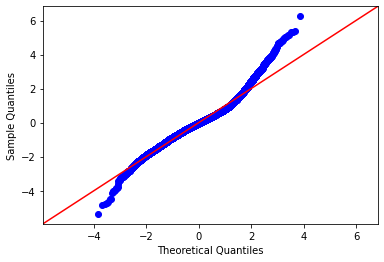

In [64]:
residuals = model5.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### Summary for model 5:
Look's the samw with model 4.

### Model 6: Waterfront + Square Feet
Two most important features by EDA.

    
    

In [65]:
data_ols6 = pd.concat([df['price'], waterfront_dummies, df['living_log']], axis = 1)

In [66]:
data_ols6.rename(columns = {'water_1.0': 'water_1'}, inplace = True)

outcome = 'price'
predictors = data_ols6.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [67]:
model6 = ols(formula=formula, data=data_ols6).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     3946.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:56:10   Log-Likelihood:            -2.3698e+05
No. Observations:               17637   AIC:                         4.740e+05
Df Residuals:                   17634   BIC:                         4.740e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.736e+06   2.48e+04    -69.984      0.000   -1.78e+06   -1.69e+06
water_1     1.471e+05   2.76e+04      5.321      0.000    9.29e+04    2.01e+05
living_log  2.941e+05   3315.122     88.721      0.000    2.88e+05    3.01e+05
==============================================================================
Omnibus:                      750.192   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              849.859
Skew:                           0.538   Prob(JB):                    2.85e-185
Kurtosis:                       2.971   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


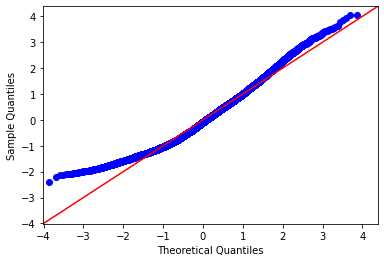

In [68]:
residuals = model6.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### Summary for model 6:
* R-Squared = 0.309 (*meaning that we are only able to explain 30% of the variance.*)
* all P-Value is high

Simple model doesn't give us a good result.

### Model 7:  One more try to compare Waterfront, Grade, and  Square Feet 

In [69]:
data_ols7 = pd.concat([df['price'], waterfront_dummies, grade_dummies, df['living_log']], axis = 1)

In [70]:
data_ols7.rename(columns = {'water_1.0': 'water_1'}, inplace = True)

outcome = 'price'
predictors = data_ols7.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum


In [71]:
model7 = ols(formula=formula, data=data_ols7).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     1216.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:58:57   Log-Likelihood:            -2.3562e+05
No. Observations:               17637   AIC:                         4.713e+05
Df Residuals:                   17626   BIC:                         4.713e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.424e+05   1.56e+05     -4.773      0.000   -1.05e+06   -4.38e+05
water_1     1.359e+05   2.56e+04      5.307      0.000    8.57e+04    1.86e+05
grade_4    -9.729e+04   1.58e+05     -0.616      0.538   -4.07e+05    2.12e+05
grade_5    -1.077e+05   1.54e+05     -0.700      0.484   -4.09e+05    1.94e+05
grade_6    -8.496e+04   1.53e+05     -0.554      0.580   -3.86e+05    2.16e+05
grade_7    -4.261e+04   1.53e+05     -0.278      0.781   -3.43e+05    2.58e+05
grade_8     3.873e+04   1.53e+05      0.252      0.801   -2.62e+05     3.4e+05
grade_9      1.61e+05   1.54e+05      1.048      0.295    -1.4e+05    4.62e+05
grade_10    2.446e+05   1.54e+05      1.591      0.112   -5.67e+04    5.46e+05
grade_11    3.325e+05   1.55e+05      2.139      0.032    2.78e+04    6.37e+05
living_log  1.606e+05   4135.141     38.839      0.000    1.53e+05    1.69e+05
==============================================================================
Omnibus:                     1011.894   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1200.521
Skew:                           0.608   Prob(JB):                    2.04e-261
Kurtosis:                       3.392   Cond. No.                     3.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


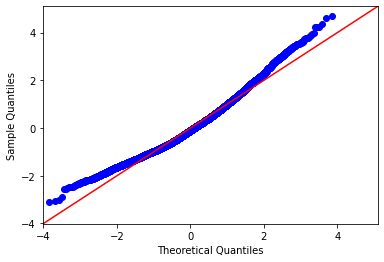

In [72]:
residuals = model7.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# Final Model

In [74]:
 df['living_log'] = np.log(df['sqft_living'])

In [75]:
data_ols_final = pd.concat([df['price'], waterfront_dummies, zipcode_dummies, df['sqft_living']], axis = 1)

In [76]:
data_ols_final.rename(columns = {'water_1.0': 'water_1'}, inplace = True)

outcome = 'price'
predictors = data_ols5.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [78]:
model_final = ols(formula=formula, data=data_ols5).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     913.0
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:04:58   Log-Likelihood:            -2.2661e+05
No. Observations:               17637   AIC:                         4.534e+05
Df Residuals:                   17565   BIC:                         4.539e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.592e+04   5885.939     -6.102      0.000   -4.75e+04   -2.44e+04
water_1      1.903e+05   1.57e+04     12.126      0.000     1.6e+05    2.21e+05
zip_98002    7426.9264   8667.518      0.857      0.392   -9562.268    2.44e+04
zip_98003     1.88e+04   7960.053      2.361      0.018    3192.621    3.44e+04
zip_98004    5.529e+05   9657.600     57.253      0.000    5.34e+05    5.72e+05
zip_98005    3.684e+05   1.06e+04     34.776      0.000    3.48e+05    3.89e+05
zip_98006    3.249e+05   7437.472     43.683      0.000     3.1e+05    3.39e+05
zip_98007    2.804e+05   9810.567     28.584      0.000    2.61e+05       3e+05
zip_98008    2.673e+05   7993.370     33.435      0.000    2.52e+05    2.83e+05
zip_98010     8.93e+04   1.51e+04      5.910      0.000    5.97e+04    1.19e+05
zip_98011    1.597e+05   8902.728     17.940      0.000    1.42e+05    1.77e+05
zip_98014    1.056e+05   1.58e+04      6.701      0.000    7.47e+04    1.37e+05
zip_98019    9.426e+04   9662.245      9.755      0.000    7.53e+04    1.13e+05
zip_98022    2.647e+04   9433.429      2.806      0.005    7980.398     4.5e+04
zip_98023   -4673.2700   6991.334     -0.668      0.504   -1.84e+04    9030.437
zip_98024    1.354e+05   2.04e+04      6.629      0.000    9.53e+04    1.75e+05
zip_98027     2.51e+05   8120.091     30.915      0.000    2.35e+05    2.67e+05
zip_98028    1.464e+05   8108.262     18.055      0.000     1.3e+05    1.62e+05
zip_98029    2.626e+05   7699.919     34.100      0.000    2.47e+05    2.78e+05
zip_98030    1.177e+04   8143.061      1.446      0.148   -4187.966    2.77e+04
zip_98031    2.011e+04   8043.661      2.500      0.012    4346.227    3.59e+04
zip_98032    5644.6753   1.02e+04      0.551      0.582   -1.44e+04    2.57e+04
zip_98033    3.497e+05   7457.294     46.897      0.000    3.35e+05    3.64e+05
zip_98034    1.953e+05   6898.532     28.307      0.000    1.82e+05    2.09e+05
zip_98038    3.758e+04   6914.260      5.436      0.000     2.4e+04    5.11e+04
zip_98039    6.885e+05   3.81e+04     18.094      0.000    6.14e+05    7.63e+05
zip_98040    4.817e+05   9511.335     50.643      0.000    4.63e+05       5e+05
zip_98042    1.751e+04   7064.482      2.478      0.013    3659.823    3.14e+04
zip_98045    1.111e+05   9756.739     11.391      0.000     9.2e+04     1.3e+05
zip_98052    2.827e+05   6891.606     41.021      0.000    2.69e+05    2.96e+05
zip_98053    2.678e+05   8234.467     32.517      0.000    2.52e+05    2.84e+05
zip_98055    4.906e+04   8036.069      6.105      0.000    3.33e+04    6.48e+04
zip_98056    1.126e+05   7293.644     15.434      0.000    9.83e+04    1.27e+05
zip_98058    4.758e+04   7281.329      6.535      0.000    3.33e+04    6.19e+04
zip_98059    1.091e+05   7366.855     14.814      0.000    9.47e+04    1.24e+05
zip_98065    1.428e+05   7917.830     18.03

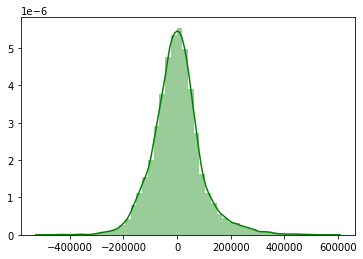

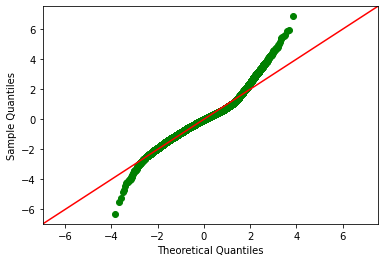

In [82]:
fig = sns.distplot(model_final.resid, color = 'green')
fig = sm.graphics.qqplot(model.resid, line = '45',fit = True, color = 'green')
plt.show()

## Train the model

In [83]:
y = data_ols5['price']
X = data_ols5.drop(['price'], axis = 1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
print(len(X_train), len(X_test), len(y_train), len(y_test))


14109 3528 14109 3528


In [87]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [88]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [89]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Mean Squarred Error: 8418614894.9895
Test Mean Squarred Error: 8722775030.193956
Train Root Mean Squarred Error: 91753.01027753532
Test Root Mean Squarred Error: 93395.79771164202


# Plots for final model

Text(0.5, 1.0, 'Actuals vs. Train Predictions')

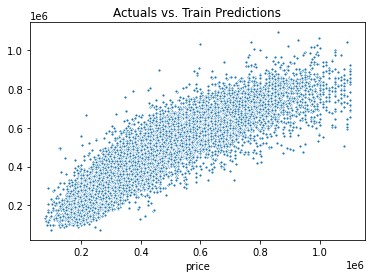

In [92]:
sns.scatterplot(y_train, y_hat_train, marker = '.')
plt.title('Actuals vs. Train Predictions')

Text(0.5, 1.0, 'Actuals vs. Test Predictions')

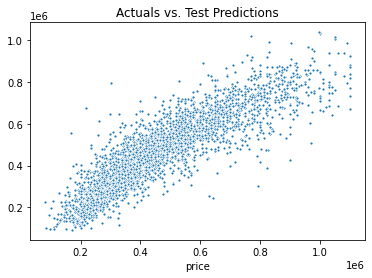

In [93]:
sns.scatterplot(y_test, y_hat_test, marker = '.')
plt.title('Actuals vs. Test Predictions')

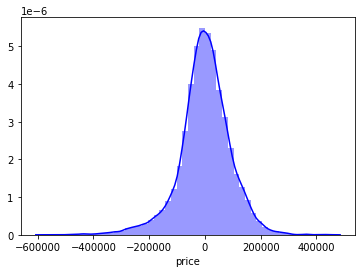

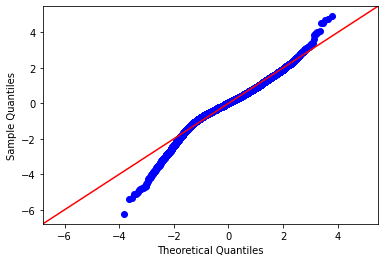

In [94]:
fig = sns.distplot(train_residuals, color = 'blue')
sm.graphics.qqplot(train_residuals, line = '45',fit = True, color = 'blue')
plt.show()

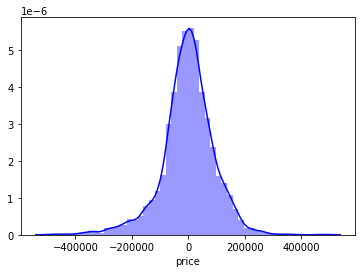

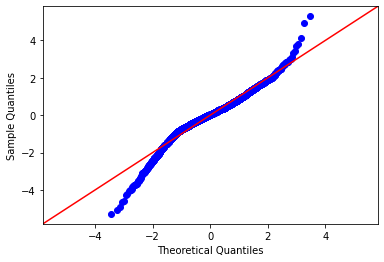

In [97]:
fig = sns.distplot(test_residuals, color = 'blue')
sm.graphics.qqplot(test_residuals, line = '45',fit = True, color = 'blue')
plt.show()

### Summary for final model

My final model include:
* sqft_living - the amount of square feet encompassed by the living space
* waterfront - a dummy variable that tells us whether or not the house is on the water
* zipcode - a dummy variable telling us which ZipCode the house is in

My model params:
* Intercept = 35920 
* Coefficient for sqft_living = 162.4356 
* Coefficient for waterfront = 190300
* Coefficient for zipcode - different values for each code

**What mean intercept?**

Our starting point for price. With no other information, this number doesn't make a whole lot of sense. This is saying for a 0 sq. ft. house, in none of the zipcodes, not on the water, it will cost -$35920. Again, by itself, it doesn't make a whole lot of sense. It really just serves as a starting point on which we'll add to.

**What give us coefficients?**

This says that for every increase in a square foot unit, the house's price will increase by value of coefficient: for waterfront this number is telling us that if a house is on the waterfront, we should add 190300 to its price.

**P-value**

Some of the features have p-value under the level of 0.05, but my overall p-value is 0, that mean all other assumptions were met and R-square achievwd a high level. 

**RMSE**
* RMSE = 102k (*on averate I make mistake by +/- 1002k in price*)

